In [70]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import LSTM, Bidirectional, Dropout, Flatten
from keras.datasets import imdb
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

path = "C:/Users/platform_001/Desktop/2020 동계인턴/베어링 사전 연구/코드/tensorflow-fcwta-master"
data = np.load(path+'/Data/data.npy', allow_pickle=True)
label = np.load(path+'/Data/label.npy', allow_pickle=True)

data_nor=[]

for i in data:
    i=[(float(i[j])) for j in range(1024)]
    temp2=[]
    minv=min(i)
    maxv=max(i)
    maxmin=maxv-minv
    for k in i:
        temp2.append((k-minv)/maxmin)
    data_nor.append(temp2)    
df=np.array(data_nor)


x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape, y_train.shape)

sess = tf.InteractiveSession()
y_train = tf.one_hot(y_train, depth=10).eval()
y_test = tf.one_hot(y_test, depth=10).eval()
y_valid = tf.one_hot(y_valid, depth=10).eval()
sess.close()

(31468, 1024) (31468,)


In [71]:
input_step = 1024
feature = 1
batch_size = 256
epoch = 100


print('Loading data...')
print(len(x_train), x_train.shape, 'train sequences')
print(len(x_test), x_test.shape, 'test sequences')
x_train = np.reshape(x_train, (x_train.shape[0], input_step, feature))
x_test = np.reshape(x_test, (x_test.shape[0], input_step, feature))
x_valid = np.reshape(x_valid, (x_valid.shape[0], input_step, feature))
print(len(x_train), x_train.shape, 'train sequences')
print(len(x_test), x_test.shape, 'test sequences')


Loading data...
31468 (31468, 1024) train sequences
9834 (9834, 1024) test sequences
31468 (31468, 1024, 1) train sequences
9834 (9834, 1024, 1) test sequences


In [76]:
from keras import optimizers
print('Build model...')
model = Sequential()


model.add(Conv1D(filters=16, kernel_size=32, padding='valid', activation='relu', strides=1, input_shape=(input_step, feature)))
model.add(MaxPooling1D(pool_size=2, stride=2))
model.add(Conv1D(filters=16, kernel_size=20, padding='valid', activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=2, stride=2))
#model.add(Flatten())
model.add(LSTM(50, input_shape=[batch_size, 119, 16]))
#model.add(LSTM(64, input_shape=(input_step, feature))) # input_shape = [batch_size, time_steps, features]
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy', 'categorical_accuracy'])

print(model.summary())

Build model...


C:\Users\platform_001\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2, strides=2)`
  import sys
C:\Users\platform_001\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2, strides=2)`
  if __name__ == '__main__':


Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_39 (Conv1D)           (None, 993, 16)           528       
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 496, 16)           0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 239, 16)           5136      
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 119, 16)           0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 50)                13400     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                510       
Total params: 19,574
Trainable params: 19,574
Non-trainable params: 0
_________________________________________________

In [77]:
print('Train')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epoch,
          validation_data=(x_valid, y_valid))


Train
Train on 31468 samples, validate on 7868 samples
Epoch 1/100
31468/31468 [==============================] - 86s 3ms/step - loss: 2.1651 - accuracy: 0.1744 - categorical_accuracy: 0.1744 - val_loss: 2.0548 - val_accuracy: 0.2173 - val_categorical_accuracy: 0.2173
Epoch 2/100
31468/31468 [==============================] - 86s 3ms/step - loss: 2.0228 - accuracy: 0.2438 - categorical_accuracy: 0.2438 - val_loss: 1.9600 - val_accuracy: 0.2916 - val_categorical_accuracy: 0.2916
Epoch 3/100
31468/31468 [==============================] - 91s 3ms/step - loss: 1.9352 - accuracy: 0.2926 - categorical_accuracy: 0.2926 - val_loss: 1.8314 - val_accuracy: 0.3358 - val_categorical_accuracy: 0.3358
Epoch 4/100
31468/31468 [==============================] - 82s 3ms/step - loss: 1.8046 - accuracy: 0.3342 - categorical_accuracy: 0.3342 - val_loss: 1.6946 - val_accuracy: 0.3757 - val_categorical_accuracy: 0.3757
Epoch 5/100
31468/31468 [==============================] - 85s 3ms/step - loss: 1.7286 - 

Epoch 39/100
31468/31468 [==============================] - 226s 7ms/step - loss: 0.5540 - accuracy: 0.8071 - categorical_accuracy: 0.8071 - val_loss: 0.5817 - val_accuracy: 0.7947 - val_categorical_accuracy: 0.7947
Epoch 40/100
31468/31468 [==============================] - 206s 7ms/step - loss: 0.5323 - accuracy: 0.8135 - categorical_accuracy: 0.8135 - val_loss: 0.5557 - val_accuracy: 0.8052 - val_categorical_accuracy: 0.8052
Epoch 41/100
31468/31468 [==============================] - 203s 6ms/step - loss: 0.5136 - accuracy: 0.8212 - categorical_accuracy: 0.8212 - val_loss: 0.5222 - val_accuracy: 0.8174 - val_categorical_accuracy: 0.8174
Epoch 42/100
31468/31468 [==============================] - 205s 7ms/step - loss: 0.4990 - accuracy: 0.8266 - categorical_accuracy: 0.8266 - val_loss: 0.5677 - val_accuracy: 0.8007 - val_categorical_accuracy: 0.8007
Epoch 43/100
31468/31468 [==============================] - 202s 6ms/step - loss: 0.5233 - accuracy: 0.8166 - categorical_accuracy: 0.81

31468/31468 [==============================] - 70s 2ms/step - loss: 0.2363 - accuracy: 0.9197 - categorical_accuracy: 0.9197 - val_loss: 0.2514 - val_accuracy: 0.9143 - val_categorical_accuracy: 0.9143
Epoch 78/100
31468/31468 [==============================] - 70s 2ms/step - loss: 0.2341 - accuracy: 0.9216 - categorical_accuracy: 0.9216 - val_loss: 0.2784 - val_accuracy: 0.9038 - val_categorical_accuracy: 0.9038
Epoch 79/100
31468/31468 [==============================] - 70s 2ms/step - loss: 0.2328 - accuracy: 0.9205 - categorical_accuracy: 0.9205 - val_loss: 0.3709 - val_accuracy: 0.8728 - val_categorical_accuracy: 0.8728
Epoch 80/100
31468/31468 [==============================] - 70s 2ms/step - loss: 0.2244 - accuracy: 0.9229 - categorical_accuracy: 0.9229 - val_loss: 0.2362 - val_accuracy: 0.9222 - val_categorical_accuracy: 0.9222
Epoch 81/100
31468/31468 [==============================] - 70s 2ms/step - loss: 0.2360 - accuracy: 0.9198 - categorical_accuracy: 0.9198 - val_loss: 0.2

In [80]:
model.evaluate(x_test, y_test, batch_size=batch_size)

9834/9834 [==============================] - 28s 3ms/step


[0.18825241948182636, 0.9370551109313965, 0.9370551109313965]

In [82]:
model.metrics_names

['loss', 'accuracy', 'categorical_accuracy']

In [86]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[2.1651312998808883, 2.022838396205977, 1.9351801502669768, 1.8045575415238015, 1.7285535370998981, 1.6493593422539492, 1.5724356426767796, 1.5028012945340763, 1.4561425945394237, 1.4420769559362723, 1.3874609155486406, 1.3472421985425957, 1.302781118679277, 1.2540864652458135, 1.2167285908218621, 1.2024621378743574, 1.1324549455252964, 1.1452417604287122, 1.0625843685222154, 1.0421462452394983, 0.9859380417014375, 0.9537933123783007, 0.920512683588258, 0.8921731424040726, 0.8536026129671681, 0.8284996781534656, 0.7751478487129692, 0.762541850072025, 0.7414704669502286, 0.714570764318209, 0.6848435917197029, 0.6659133162373613, 0.6389536107072871, 0.6336347994968642, 0.6093798474706658, 0.580771827009804, 0.5508188312323709, 0.5456081733128403, 0.5539621218605206, 0.5323289029212136, 0.5136271627882437, 0.4989554115834011, 0.5232757849464184, 0.45968983316415446, 0.4477550017079086, 0.44504264770263907, 0.4499700314680109, 0.42634164591491397, 0.4199007966473852, 0.4104726603059343, 0.

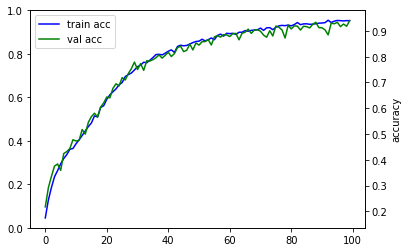

In [90]:
import matplotlib.pyplot as plt

hist = history

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
#loss_ax.set_xlabel('epoch')
#loss_ax.set_ylabel('loss')
#loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()